<img src="../assets/a_type_readme.gif" style="float:right ; margin: 10px ; width:300px;"> 
<h1><left>NLP Project</left></h1>
<h4><left>Using Natural Language Processing to better understand Depression & Anxiety</left></h4>
___

## 2. Data Cleaning, preprocessing, and EDA

In [58]:
import numpy as np
import pandas as pd
import seaborn as sns
from random import randint
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 100)
sns.set_style("darkgrid")

import nltk
from nltk.tokenize import RegexpTokenizer, sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('wordnet')
nltk.download('stopwords')

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import wordninja

import math

%matplotlib inline
import scattertext as st
import re, io
from pprint import pprint
from scipy.stats import rankdata, hmean, norm
import spacy
import os, pkgutil, json, urllib
from urllib.request import urlopen
from IPython.display import IFrame
from IPython.core.display import display, HTML
from scattertext import CorpusFromPandas, produce_scattertext_explorer
display(HTML("<style>.container { width:98% !important; }</style>"))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\yegmo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yegmo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
depression = pd.read_csv('../data/depression.csv')
anxiety = pd.read_csv('../data/anxiety.csv')

In [6]:
pd.set_option('display.max_columns', 500)
depression.head()

approved_at_utc   subreddit  \
0              NaN  depression   
1              NaN  depression   
2              NaN  depression   
3              NaN  depression   
4              NaN  depression   

                                            selftext author_fullname  saved  \
0  We understand that most people who reply immed...         t2_1t70  False   
1  Welcome to /r/depression's check-in post - a p...         t2_1t70  False   
2  I'm so low rn I can't even type anything coher...     t2_8oa0yyky  False   
3  When I wake up after 8 hours of decent sleep I...     t2_8bk84r51  False   
4  I guess i have always been depressed but never...     t2_bzoskmwx  False   

   mod_reason_title  gilded  clicked  \
0               NaN       1    False   
1               NaN       0    False   
2               NaN       0    False   
3               NaN       0    False   
4               NaN       0    False   

                                               title link_flair_richtext  \
0  Our most-broken and least-understood rules is ...                  []   
1  Regular Check-In Post, with important reminder...                  []   
2                                                Low                  []   
3  I’m always amazed at how much energy healthy p...                  []   
4                30 and never lived a day in my life                  []   

  subreddit_name_prefixed  hidden  pwls  link_flair_css_class  downs  \
0            r/depression   False   0.0                   NaN      0   
1            r/depression   False   0.0                   NaN      0   
2            r/depression   False   0.0                   NaN      0   
3            r/depression   False   0.0                   NaN      0   
4            r/depression   False   0.0                   NaN      0   

   top_awarded_type  hide_score       name  quarantine link_flair_text_color  \
0               NaN       False  t3_doqwow       False                  dark   
1               NaN       False  t3_m246c4       False                  dark   
2               NaN       False  t3_n728cp       False                  dark   
3               NaN       False  t3_n6fydg       False                  dark   
4               NaN       False  t3_n6ye5n       False                  dark   

   upvote_ratio  author_flair_background_color subreddit_type   ups  \
0          1.00                            NaN         public  2319   
1          1.00                            NaN         public   312   
2          1.00                            NaN         public   263   
3          1.00                            NaN         public  1281   
4          0.97                            NaN         public    36   

   total_awards_received media_embed  author_flair_template_id  \
0                    294          {}                       NaN   
1                     23          {}                       NaN   
2                      3          {}                       NaN   
3                      1          {}                       NaN   
4                      0          {}                       NaN   

   is_original_content user_reports  secure_media  is_reddit_media_domain  \
0                False           []           NaN                   False   
1                False           []           NaN                   False   
2                False           []           NaN                   False   
3                False           []           NaN                   False   
4                False           []           NaN                   False   

   is_meta  category secure_media_embed  link_flair_text  can_mod_post  score  \
0    False       NaN                 {}              NaN         False   2319   
1    False       NaN                 {}              NaN         False    312   
2    False       NaN                 {}              NaN         False    263   
3    False       NaN                 {}              NaN         False   1281   
4    False       Na

### 2.1 Data Cleaning

In [7]:
dep_columns = depression[["title", "selftext", "author", "score", "num_comments", "is_anxiety", "url"]]
anx_columns = anxiety[["title", "selftext", "author", "score", "num_comments", "is_anxiety", "url"]]

combined_data = pd.concat([dep_columns, anx_columns], axis=0, ignore_index=True)
combined_data.to_csv('../data/combined_data.csv', index = False)
combined_data

title  \
0     Our most-broken and least-understood rules is ...   
1     Regular Check-In Post, with important reminder...   
2                                                   Low   
3     I’m always amazed at how much energy healthy p...   
4                   30 and never lived a day in my life   
...                                                 ...   
1925     Any tips on how not to panic during a midterm?   
1926  I find myself apologizing really often, checki...   
1927  I typed out my anxiety attack and thought I sh...   
1928  something happened that just triggered my anxi...   
1929                             Fear of Unknown Person   

                                               selftext                author  \
0     We understand that most people who reply immed...              SQLwitch   
1     Welcome to /r/depression's check-in post - a p...              SQLwitch   
2     I'm so low rn I can't even type anything coher...         RagingFlock89   
3     When I wake up after 8 hours of decent sleep I...               cezzzie   
4     I guess i have always been depressed but never...   ApprehensiveYou2385   
...                                                 ...                   ...   
1925  I have an Applied Statics midterm tomorrow. I ...  Anomalistic_Username   
1926  I've recently decided to stop smoking weed (so...             zedhenson   
1927  I recently got into a little habit where when ...          Tree-Nui-Tee   
1928                   i need someone to vent to please              Capzfan5   
1929  Everytime I go to my Grandma's old house (she'...           PanamaPhys_   

      score  num_comments  is_anxiety  \
0      2319           175           0   
1       312          1136           0   
2       263            43           0   
3      1281           120           0   
4        36             5           0   
...     ...           ...         ...   
1925      2             0           1   
1926      3             1           1   
1927      2             4           1   
1928      8             5           1   
1929      2             0           1   

                                                    url  
0     https://www.reddit.com/r/depression/comments/d...  
1     https://www.reddit.com/r/depression/comments/m...  
2     https://www.reddit.com/r/depression/comments/n...  
3     https://www.reddit.com/r/depression/comments/n...  
4     https://www.reddit.com/r/depression/comments/n...  
...                                                 ...  
1925  https://www.reddit.com/r/Anxiety/comments/n3p5...  
1926  https://www.reddit.com/r/Anxiety/comments/n3n1...  
1927  https://www.reddit.com/r/Anxiety/comments/n3oz...  
1928  https://www.reddit.com/r/Anxiety/comments/n3gc...  
1929  https://www.reddit.com/r/Anxiety/comments/n3ot...  

[1930 rows x 7 columns]

In [8]:
print(combined_data[combined_data["selftext"].isnull()].head(10))

combined_data["selftext"].fillna("emptypost", inplace=True)

                                                 title selftext  \
377                                       FUCK YOU god      NaN   
519  Can being in my room, with no light ever, on m...      NaN   
688                                      Smiling sadly      NaN   
782  I’m not happy with my life but I don’t know wh...      NaN   
803  Depressed for 9 years, Dad left me, Mom doesn'...      NaN   
827  My family says I can’t tell anyone about me be...      NaN   
847  I want to break things and throw stuff across ...      NaN   
855  Well Ima kms today so yeah that’s it, no going...      NaN   
883  Sometimes I wish I just went crazy from all th...      NaN   
942  Anyone else start off when going outside feeli...      NaN   

              author  score  num_comments  is_anxiety  \
377        detolhand     16            11           0   
519  throwaway161241      3             1           0   
688     LimitlessNRG      1             0           0   
782    depression203      2       

In [9]:
combined_data.to_csv('../data/combined_data.csv', index = False)

### 2.2 Pre-processing

In [11]:
def processing_text(series_to_process):
    new_post = []
    new_post_words = []
    broken_sentences = []
    broken_words = []
    
    tokenizer = RegexpTokenizer(r'(\w+)')
    lemmatizer = WordNetLemmatizer()
    
    for i in range(len(series_to_process)):
        dirty_string = (series_to_process)[i].lower()
        
        sentences = sent_tokenize(dirty_string)
        broken_sentences.append(sentences)
        
        words_only = tokenizer.tokenize(dirty_string) 
        broken_words.append(words_only)
        
        words_only_lem = [lemmatizer.lemmatize(i) for i in words_only]
        words_without_stop = [i for i in words_only_lem if i not in stopwords.words("english")]
        
        new_post_words.append(words_without_stop)
        
        long_string_clean = " ".join(word for word in words_without_stop)
        
        new_post.append(long_string_clean)
        
    return new_post, broken_sentences, broken_words, new_post_words

In [12]:
combined_data["selftext_clean"], combined_data["selftext_broken_sentences"], _, combined_data["selftext_broken_words"] = processing_text(combined_data["selftext"])
combined_data["title_clean"], _, _, _ = processing_text(combined_data["title"])

pd.set_option("display.max_colwidth", 100)
combined_data.head(10)

title  \
0  Our most-broken and least-understood rules is "helpers may not invite private contact as a first...   
1   Regular Check-In Post, with important reminders about the No Private Contact and No Activism rules   
2                                                                                                  Low   
3                                            I’m always amazed at how much energy healthy people have.   
4                                                                  30 and never lived a day in my life   
5                  I moved my body today. I was dreading it but I did it and I just felt like sharing.   
6                                                            24 years old and never date a girl before   
7                        Anxiety of the future is taking over my life and I’m depressed because of it.   
8             Our 4 legged friends have to look over their shoulders fearing us. Is this overthinking?   
9  I’m so so so low and I know why, but I don’t want to make other people feel like I’m blaming the...   

                                                                                              selftext  \
0  We understand that most people who reply immediately to an OP with an invitation to talk private...   
1  Welcome to /r/depression's check-in post - a place to take a moment and share what is going on a...   
2  I'm so low rn I can't even type anything coherent..I just want to express I'm at one of my lowes...   
3  When I wake up after 8 hours of decent sleep I’m still exhausted. All day, everyday. Not just “t...   
4  I guess i have always been depressed but never really thought much of it. I'm now 30 and I'm all...   
5  According to my health app I've been averaging 321 (yes) steps a day in 2021. Today I reached 7,...   
6                                                               Should I be depress? I feel so lonely.   
7  In two days, it’s my birthday. As I’m writing this, I’m sobbing. For the past two days, I’ve cri...   
8  Idk if it happens everywhere, but where I live stray cats and dogs often go to various houses lo...   
9  Husband doesn’t understand why I can’t just get out of bed and gets mad about it. Now I’m at a p...   

                 author  score  num_comments  is_anxiety  \
0              SQLwitch   2319           175           0   
1              SQLwitch    312          1136           0   
2         RagingFlock89    263            43           0   
3               cezzzie   1281           120           0   
4   ApprehensiveYou2385     36             5           0   
5                 cowoj    616            34           0   
6  AdventurousFrame4374     17            19           0   
7          yeehawyeetus     17             3           0   
8        AWiseDetective     12             3           0   
9      DrowningCantSwim     19             1           0   

                                                                                                   url  \
0     https://www.reddit.com/r/depression/comments/doqwow/our_mostbroken_and_leastunderstood_rules_is/   
1   https://www.reddit.com/r/depression/comments/m246c4/regular_checkin_post_with_important_reminders/   
2                                             https://www.reddit.com/r/depression/comments/n728cp/low/   
3     https://www.reddit.com/r/depression/comments/n6fydg/im_always_amazed_at_how_much_energy_healthy/   
4             https://www.reddit.com/r/depression/comments/n6ye5n/30_and_never_lived_a_day_in_my_life/   
5  https://www.reddit.com/r/depression/comments/n6idcp/i_moved_my_body_today_i_was_dreading_it_but_...   
6       https://www.reddit.com/r/depression/comments/n72ux9/24_years_old_and_never_date_a_girl_before/   
7  https://www.reddit.com/r/depression/comments/n72bwo/anxiety_of_the_future_is_taking_over_my_life...   
8    https://www.reddit.com/r/depression/comments/n7218c/our_4_legged_friends_have_to_look_over_their/   
9  https://www.reddit.com/r/depression/com

In [13]:
pd.set_option("display.max_colwidth", 1000)
combined_data[["selftext", "selftext_clean"]].head(2)

selftext  \
0  We understand that most people who reply immediately to an OP with an invitation to talk privately  mean only to help, but this type of response usually leads to either disappointment or disaster.  it usually works out quite differently here than when you say "PM me anytime" in a casual social context.  \n\nWe have huge admiration and appreciation for the goodwill and good citizenship of so many of you who support others here and flag inappropriate content - even more so because we know that so many of you are struggling yourselves.  We're hard at work behind the scenes on more information and resources to make it easier to give and get quality help here - this is just a small start.  \n\nOur new wiki page explains in detail why it's much better to respond in public comments, at least until you've gotten to know someone.  It will be maintained at /r/depression/wiki/private_contact, and the full text of the current version is below.\n\n*****\n\n###Summary###\n\n**Anyone who, while a...   
1  Welcome to /r/depression's check-in post - a place to take a moment and share what is going on and how you are doing. If you have an accomplishment you want to talk about (these shouldn't be standalone posts in the sub as they violate the "role model" rule, but are welcome here), or are having a tough time but prefer not to make your own post, this is a place you can share.\n\nWe try our best to keep this space as safe and supportive as possible on reddit's wide-open anonymity-friendly platform. The community rules can be found in the sidebar, or under "Community Info" in the official mobile apps. If you aren't sure about a rule, please ask us.  \n\n********\n\n**Please keep in mind that no activism, i.e.  advocating or fundraising for social change or raising awareness of social issues, is ever allowed here.**  \n\nIt's not that we're against activism.  We're strongly in favour of it.  But we've learned the hard way that it doesn't work within a dedicated support space, so with re...   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            selftext_clean  
0  understand people reply immediately op invitation talk privately mean help type response usually lead either disappointment disaster usually work quite differently say pm anytime casual social context huge admiration appreciation goodwill good citizenship many support others flag inappropriate content even know many struggling hard work behind scene information resource make easier give get quality help small start new wiki page explains detail much better respond public comment least gotten know someone maintained r depression wiki private_contact full text current version summary anyone acting helper invite accepts private contact e pm chat kind offsite communication early conversion showing either bad intention bad judgement either way unwise trust pm anytime seems like kind generous offer might perfectly well meaning unless solid rapport ha established wise idea point consider offer accept invitation communicate privately posting supportive reply pu

In [14]:
def processing_author_names(series_to_process):
    author_split = []
    
    for i in range(len(series_to_process)):
        splits_list = wordninja.split(series_to_process[i])
        combined_string = " ".join(splits_list)
        author_split.append(combined_string)
        
    new_list = []
    tokenizer = RegexpTokenizer(r'(\w+)')
    lemmatizer = WordNetLemmatizer()
    
    for i in range(len(author_split)):
        dirty_string = (author_split)[i].lower()
        
        words_only = tokenizer.tokenize(dirty_string) 
        
        words_only_lem = [lemmatizer.lemmatize(i) for i in words_only]
        
        words_without_stop = [i for i in words_only_lem if i not in stopwords.words("english")]
        
        long_string_clean = " ".join(word for word in words_without_stop)
        
        new_list.append(long_string_clean)
    
    return new_list

In [19]:
combined_data["author_clean"] = processing_author_names(combined_data["author"])

#CHECKING ON author_clean
pd.set_option("display.max_colwidth", 100)
combined_data[["author","author_clean"]].head(10)

author            author_clean
0              SQLwitch               sql witch
1              SQLwitch               sql witch
2         RagingFlock89         raging flock 89
3               cezzzie               ce zzz ie
4   ApprehensiveYou2385       apprehensive 2385
5                 cowoj                  co woj
6  AdventurousFrame4374  adventurous frame 4374
7          yeehawyeetus         yee haw yee tus
8        AWiseDetective          wise detective
9      DrowningCantSwim      drowning cant swim

In [16]:
combined_data.isnull().sum()

title                        0
selftext                     0
author                       0
score                        0
num_comments                 0
is_anxiety                   0
url                          0
selftext_clean               0
selftext_broken_sentences    0
selftext_broken_words        0
title_clean                  0
author_clean                 0
dtype: int64

### 2.3 Exploratory Data Analysis

In [17]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1930 entries, 0 to 1929
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   title                      1930 non-null   object
 1   selftext                   1930 non-null   object
 2   author                     1930 non-null   object
 3   score                      1930 non-null   int64 
 4   num_comments               1930 non-null   int64 
 5   is_anxiety                 1930 non-null   int64 
 6   url                        1930 non-null   object
 7   selftext_clean             1930 non-null   object
 8   selftext_broken_sentences  1930 non-null   object
 9   selftext_broken_words      1930 non-null   object
 10  title_clean                1930 non-null   object
 11  author_clean               1930 non-null   object
dtypes: int64(3), object(9)
memory usage: 181.1+ KB


In [18]:
depression_posts = combined_data[combined_data["is_anxiety"] == 0]["selftext_clean"]
depression_titles = combined_data[combined_data["is_anxiety"] == 0]["title_clean"]
depression_authors = combined_data[combined_data["is_anxiety"] == 0]["author_clean"]
depression_broken_words = combined_data[combined_data["is_anxiety"] == 0]["selftext_broken_words"]
depression_broken_sentences = combined_data[combined_data["is_anxiety"] == 0]["selftext_broken_sentences"]

anxiety_posts = combined_data[combined_data["is_anxiety"] == 1]["selftext_clean"]
anxiety_titles = combined_data[combined_data["is_anxiety"] == 1]["title_clean"]
anxiety_authors = combined_data[combined_data["is_anxiety"] == 1]["author_clean"]
anxiety_broken_words = combined_data[combined_data["is_anxiety"] == 1]["selftext_broken_words"]
anxiety_broken_sentences = combined_data[combined_data["is_anxiety"] == 1]["selftext_broken_sentences"]

### 2.3.1 Plot

In [43]:
def most_used_words(category_string, data_series, palette, image_mask):
    #CHECKING OUT COMMON WORDS IN r/SuicideWatch USING CVEC
    cvec = CountVectorizer(stop_words='english')
    cvec.fit(data_series)
    #CREATING A DATAFRAME OF EXTRACTED WORDS
    created_df = pd.DataFrame(cvec.transform(data_series).todense(),
                              columns=cvec.get_feature_names())
    total_words = created_df.sum(axis=0)
    
    #<<<WORDCLOUD>>>
    #CREATING A LONG STRING OF WORDS FOR THE WORD CLOUD MODULE
    top_40_words = total_words.sort_values(ascending = False).head(40)
    top_40_words_df = pd.DataFrame(top_40_words)
    top_words_cloud_df = top_40_words_df.reset_index()
    top_words_cloud_df.columns = ["words", "count"]
    one_string_list = []
    for i in range(len(top_words_cloud_df)):
        one_string = (top_words_cloud_df["words"][i] + " ")* top_words_cloud_df["count"][i]
        one_string_list.append(one_string)
    long_string = " ".join(string for string in one_string_list)
    #print(long_string)
    # CREATING A WORD CLOUD IMAGE
    mask = np.array(Image.open(image_mask))
    wordcloud = WordCloud(repeat=True, collocations=False, min_font_size=2, max_font_size= 80, max_words= 1000, background_color= "white",colormap= palette,  mask= mask).generate(long_string)
    # DISPLAY IT
    #image_colors = ImageColorGenerator(mask)
    #plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='bilinear')
    #plt.axis("off")
    plt.figure(figsize = (20, 5), dpi=300)
    plt.title('\nTop Words used in {}\n'.format(category_string), fontsize=22)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    
    #<<<BARPLOT>>>
    #CREATING A FINAL DATAFRAME OF THE TOP 20 WORDS
    top_20_words = total_words.sort_values(ascending = False).head(20)
    top_20_words_df = pd.DataFrame(top_20_words, columns = ["count"])
    #PLOTTING THE COUNT OF THE TOP 20 WORDS
    sns.set_style("white")
    plt.figure(figsize = (15, 8), dpi=300)
    ax = sns.barplot(y= top_20_words_df.index, x="count", data=top_20_words_df, palette = palette)
    
    plt.xlabel("Count", fontsize=9)
    plt.ylabel('Common Words in {}'.format(category_string), fontsize=9)
    plt.yticks(rotation=-5)
    
    return total_words    

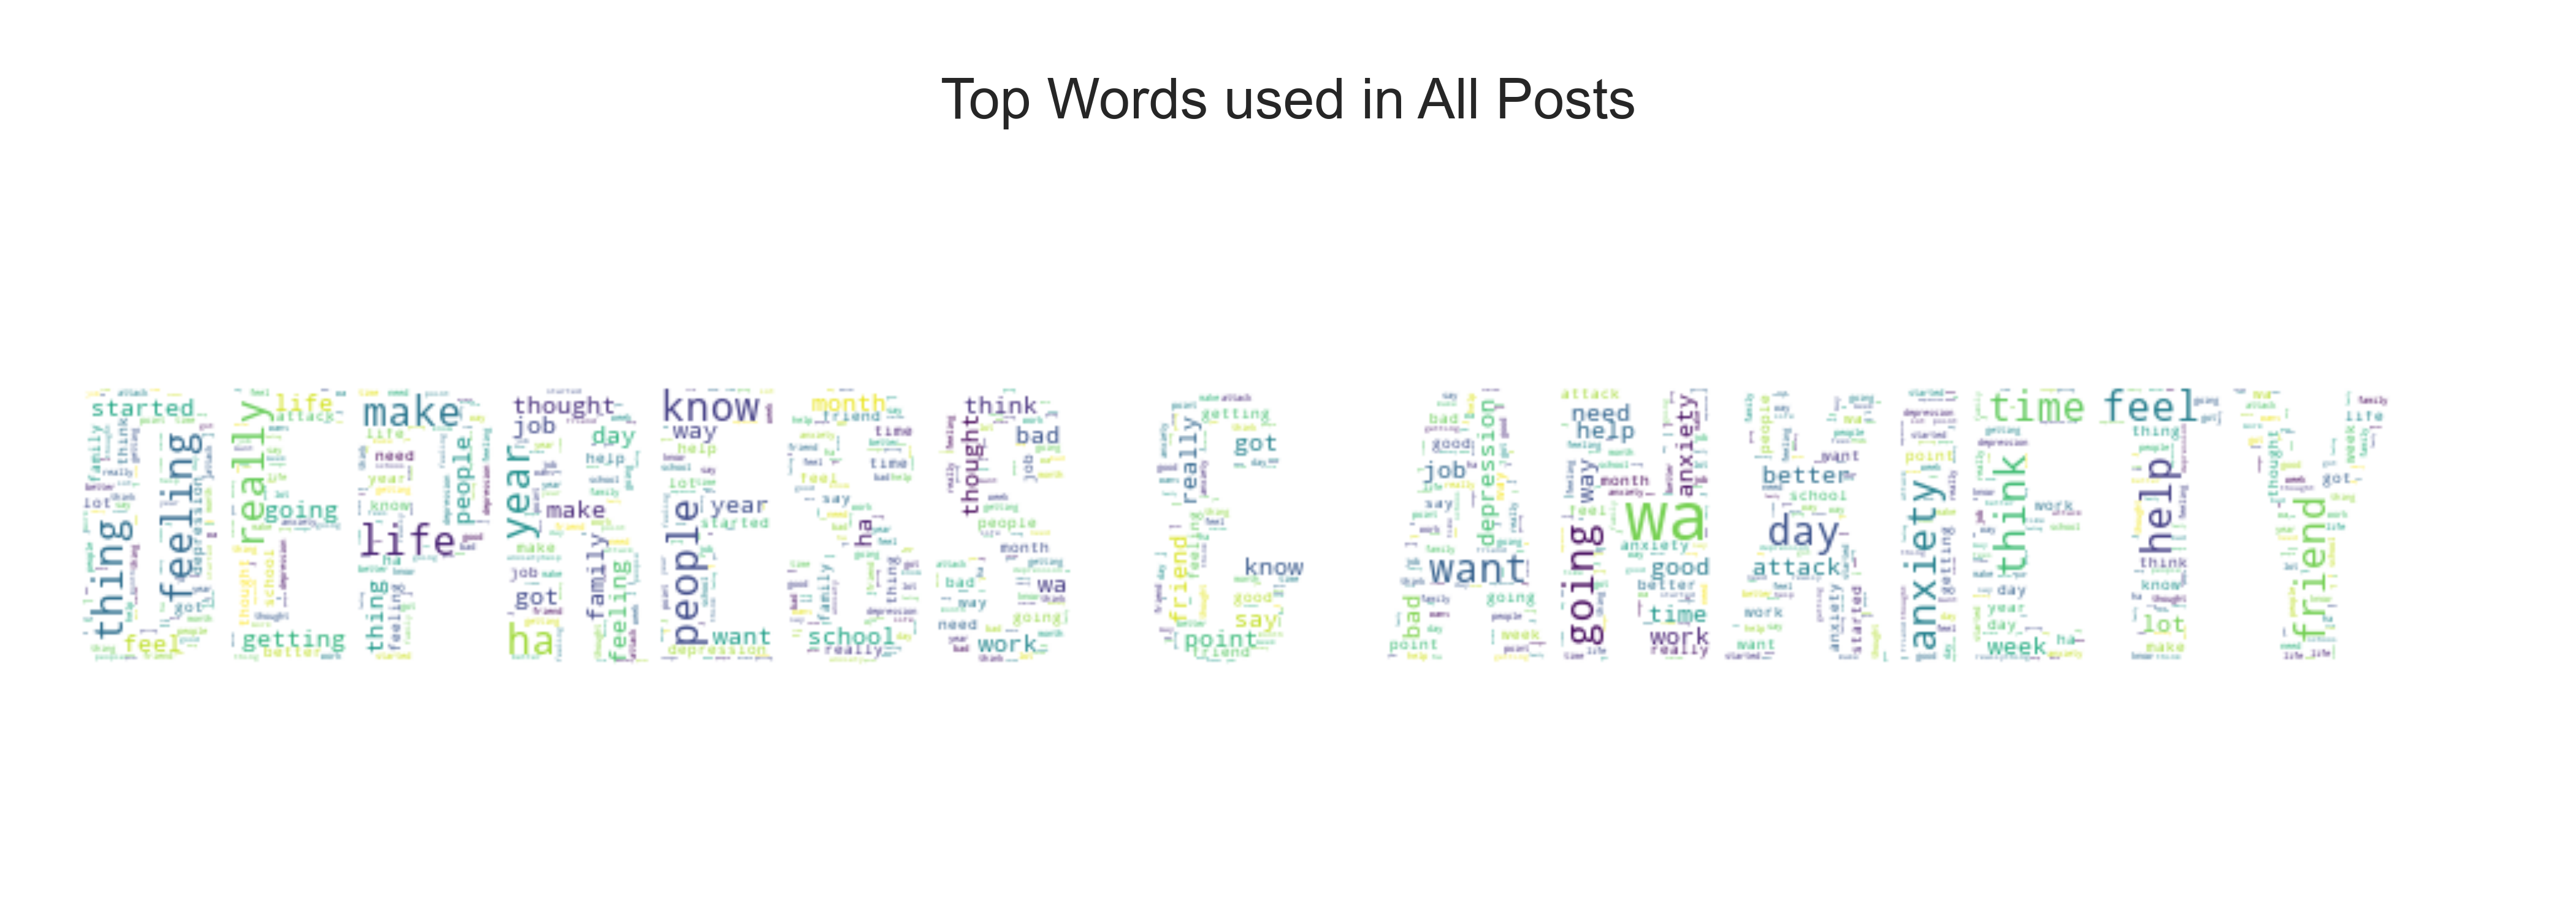

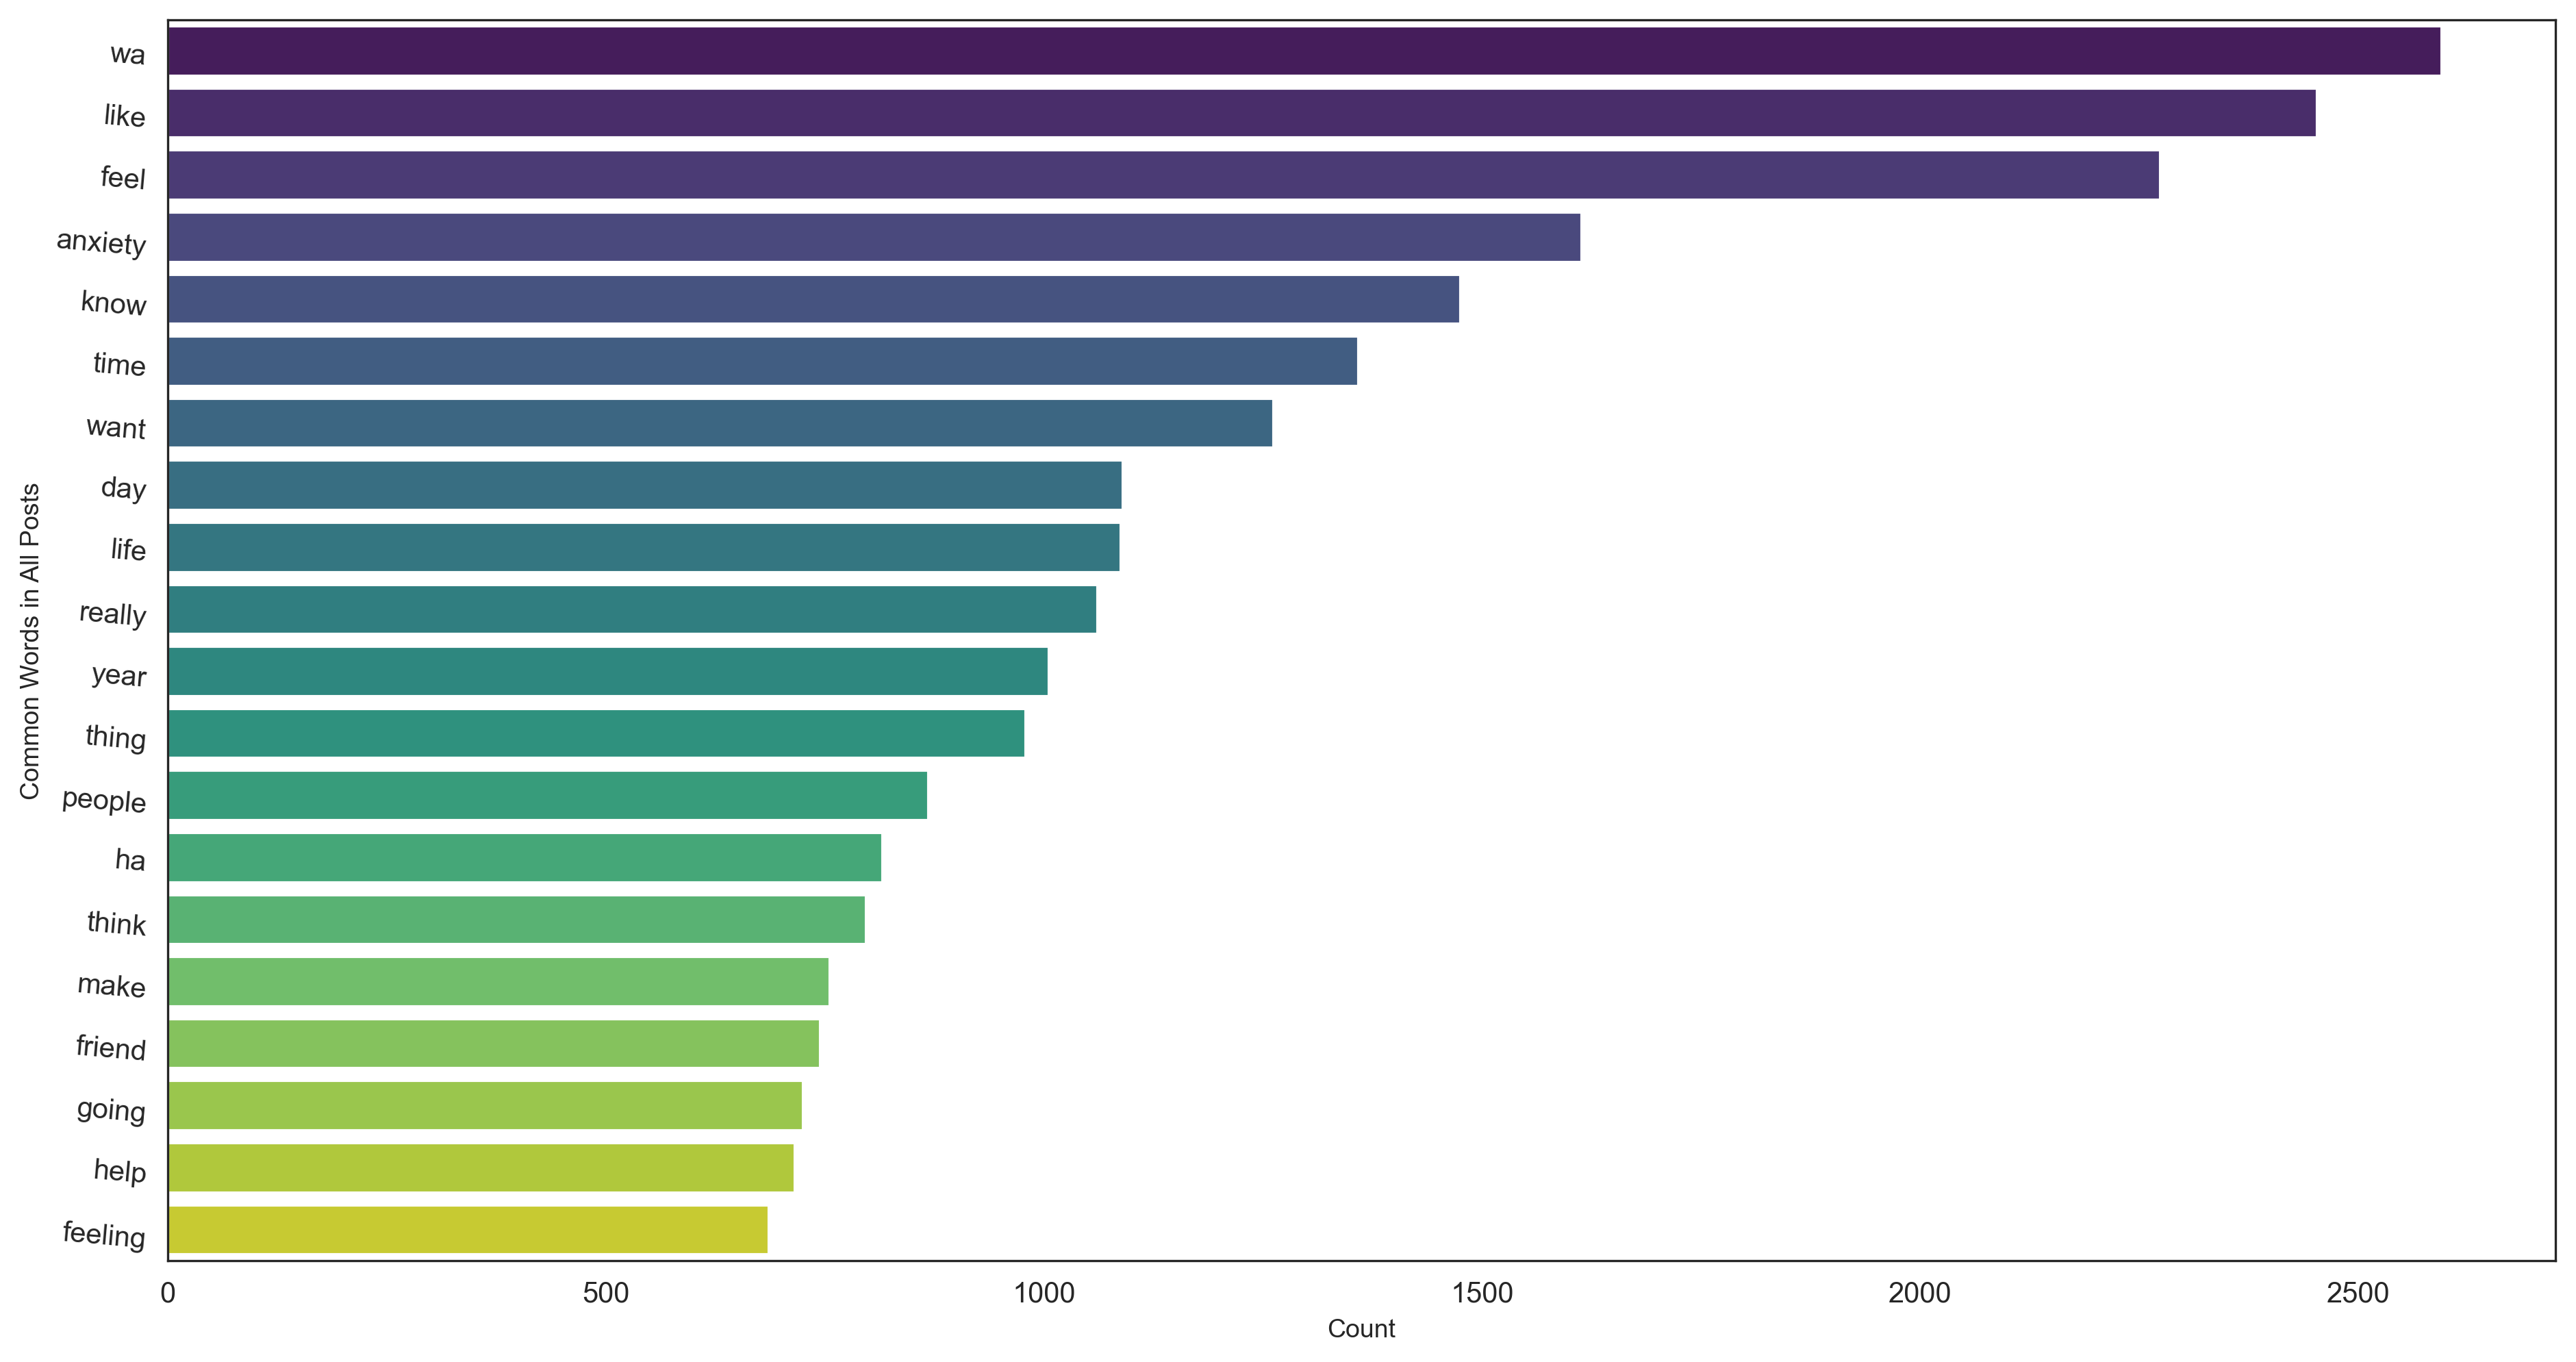

In [44]:
all_words_freq = most_used_words("All Posts", combined_data["selftext_clean"], palette="viridis", image_mask="../assets/dep_anx_mask.png")

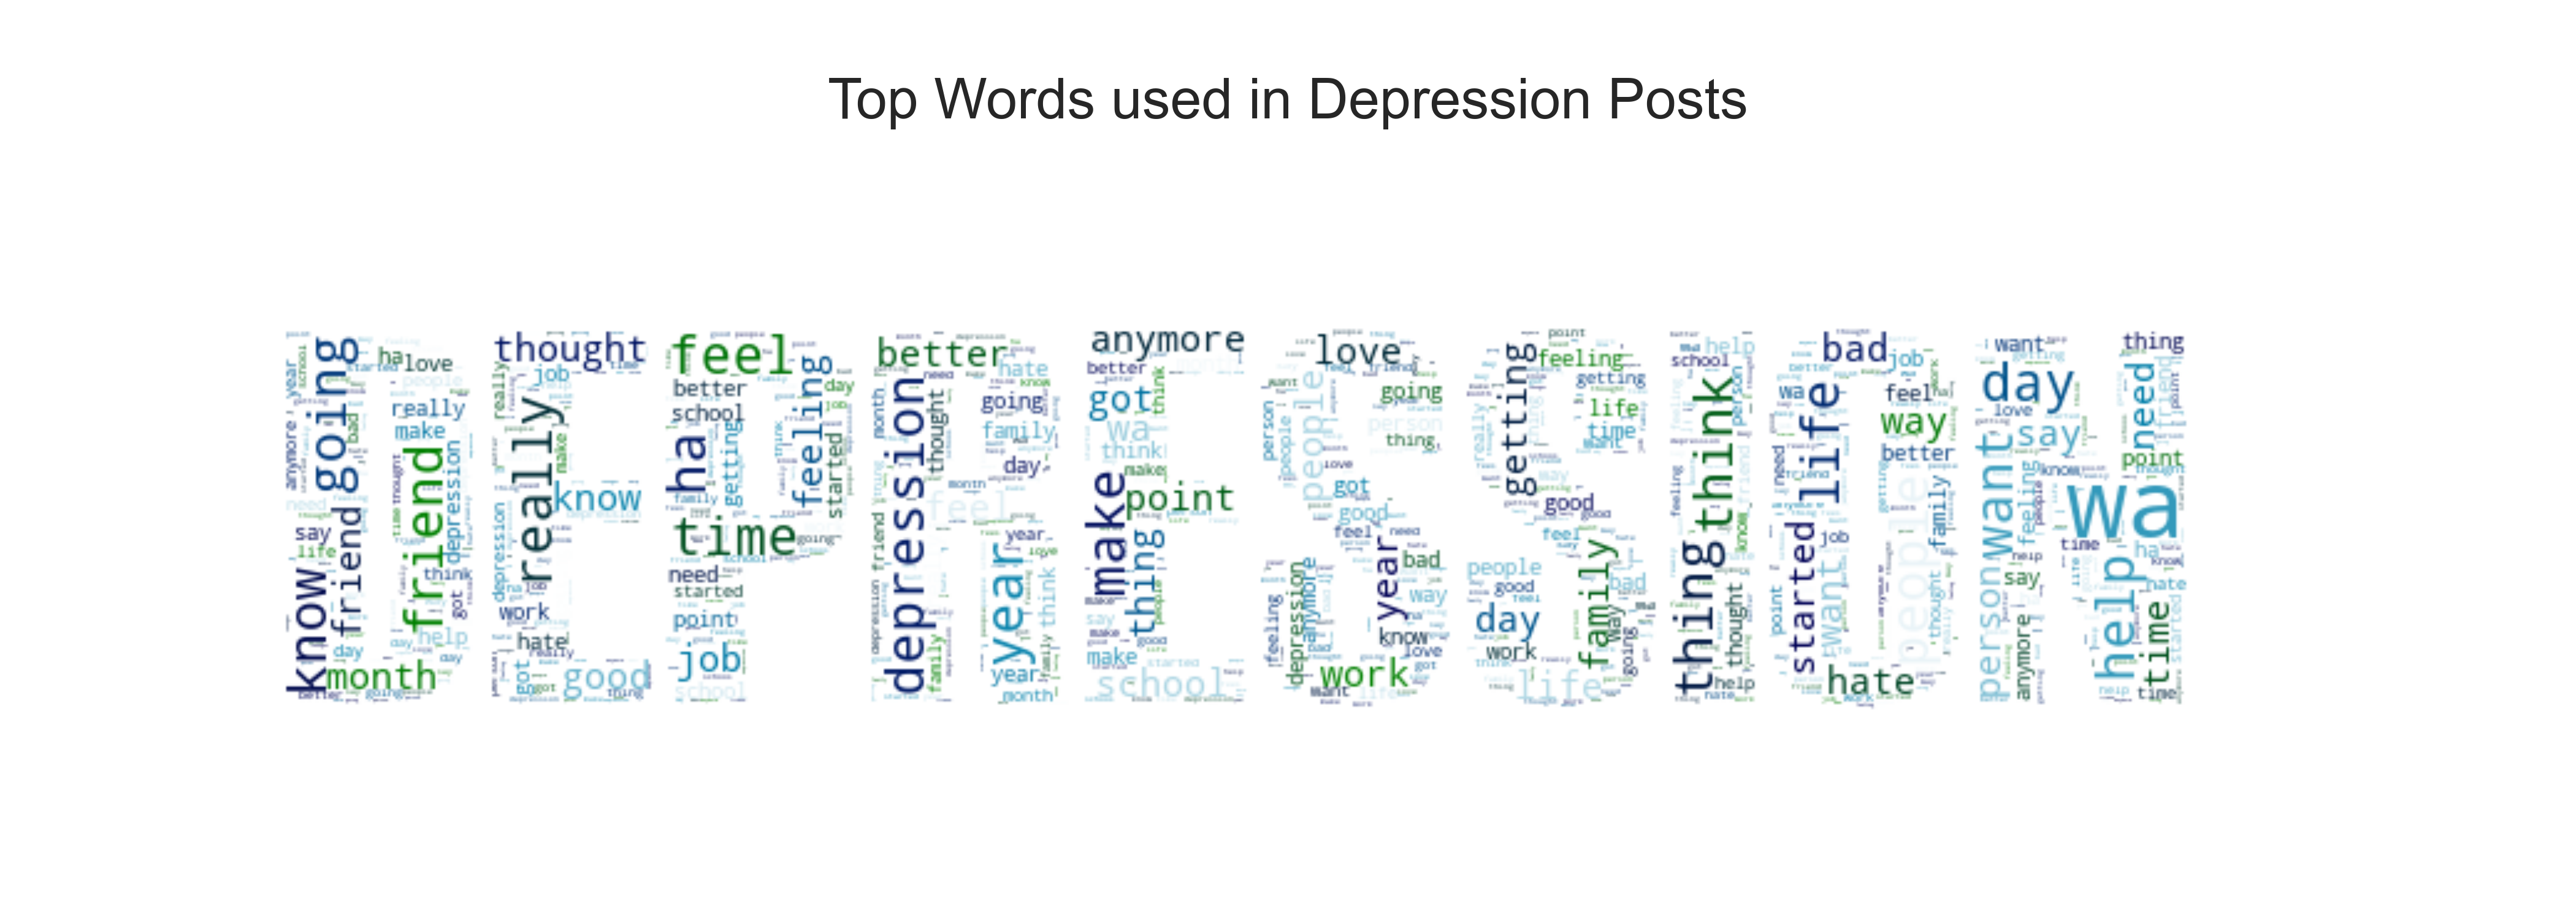

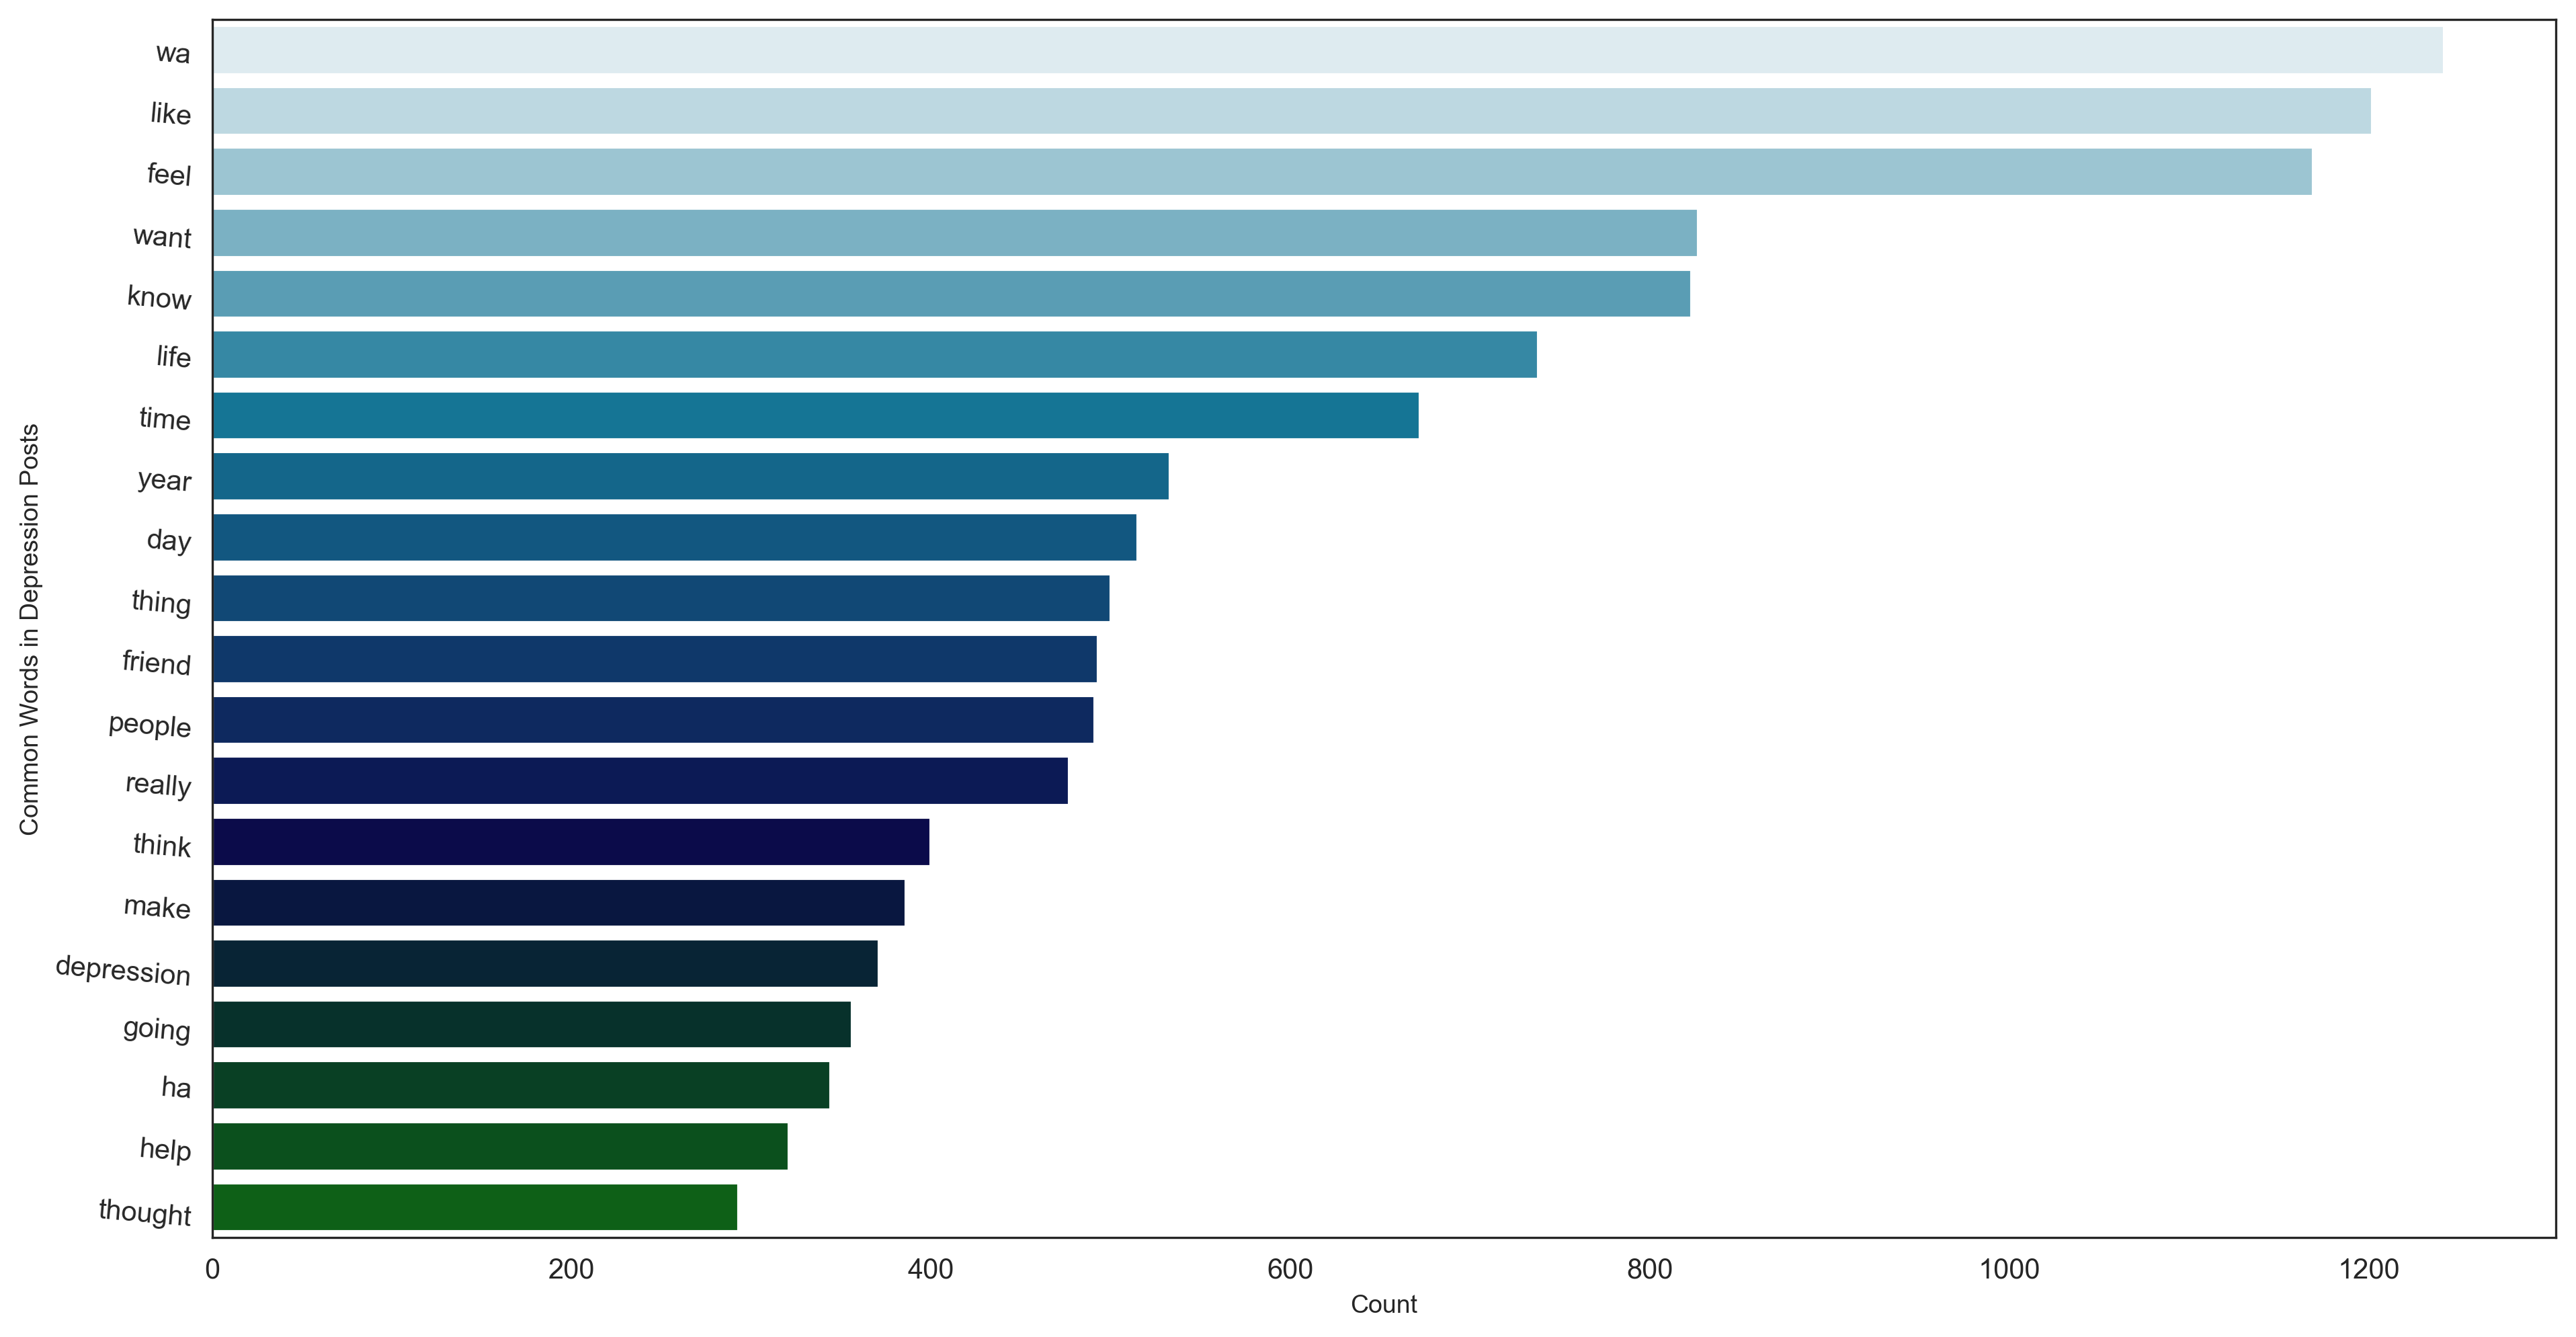

In [45]:
depression_words_freq = most_used_words("Depression Posts", depression_posts, palette="ocean_r", image_mask="../assets/depression_mask.png")
# most_used_words(depression_titles)
# most_used_words(depression_authors)

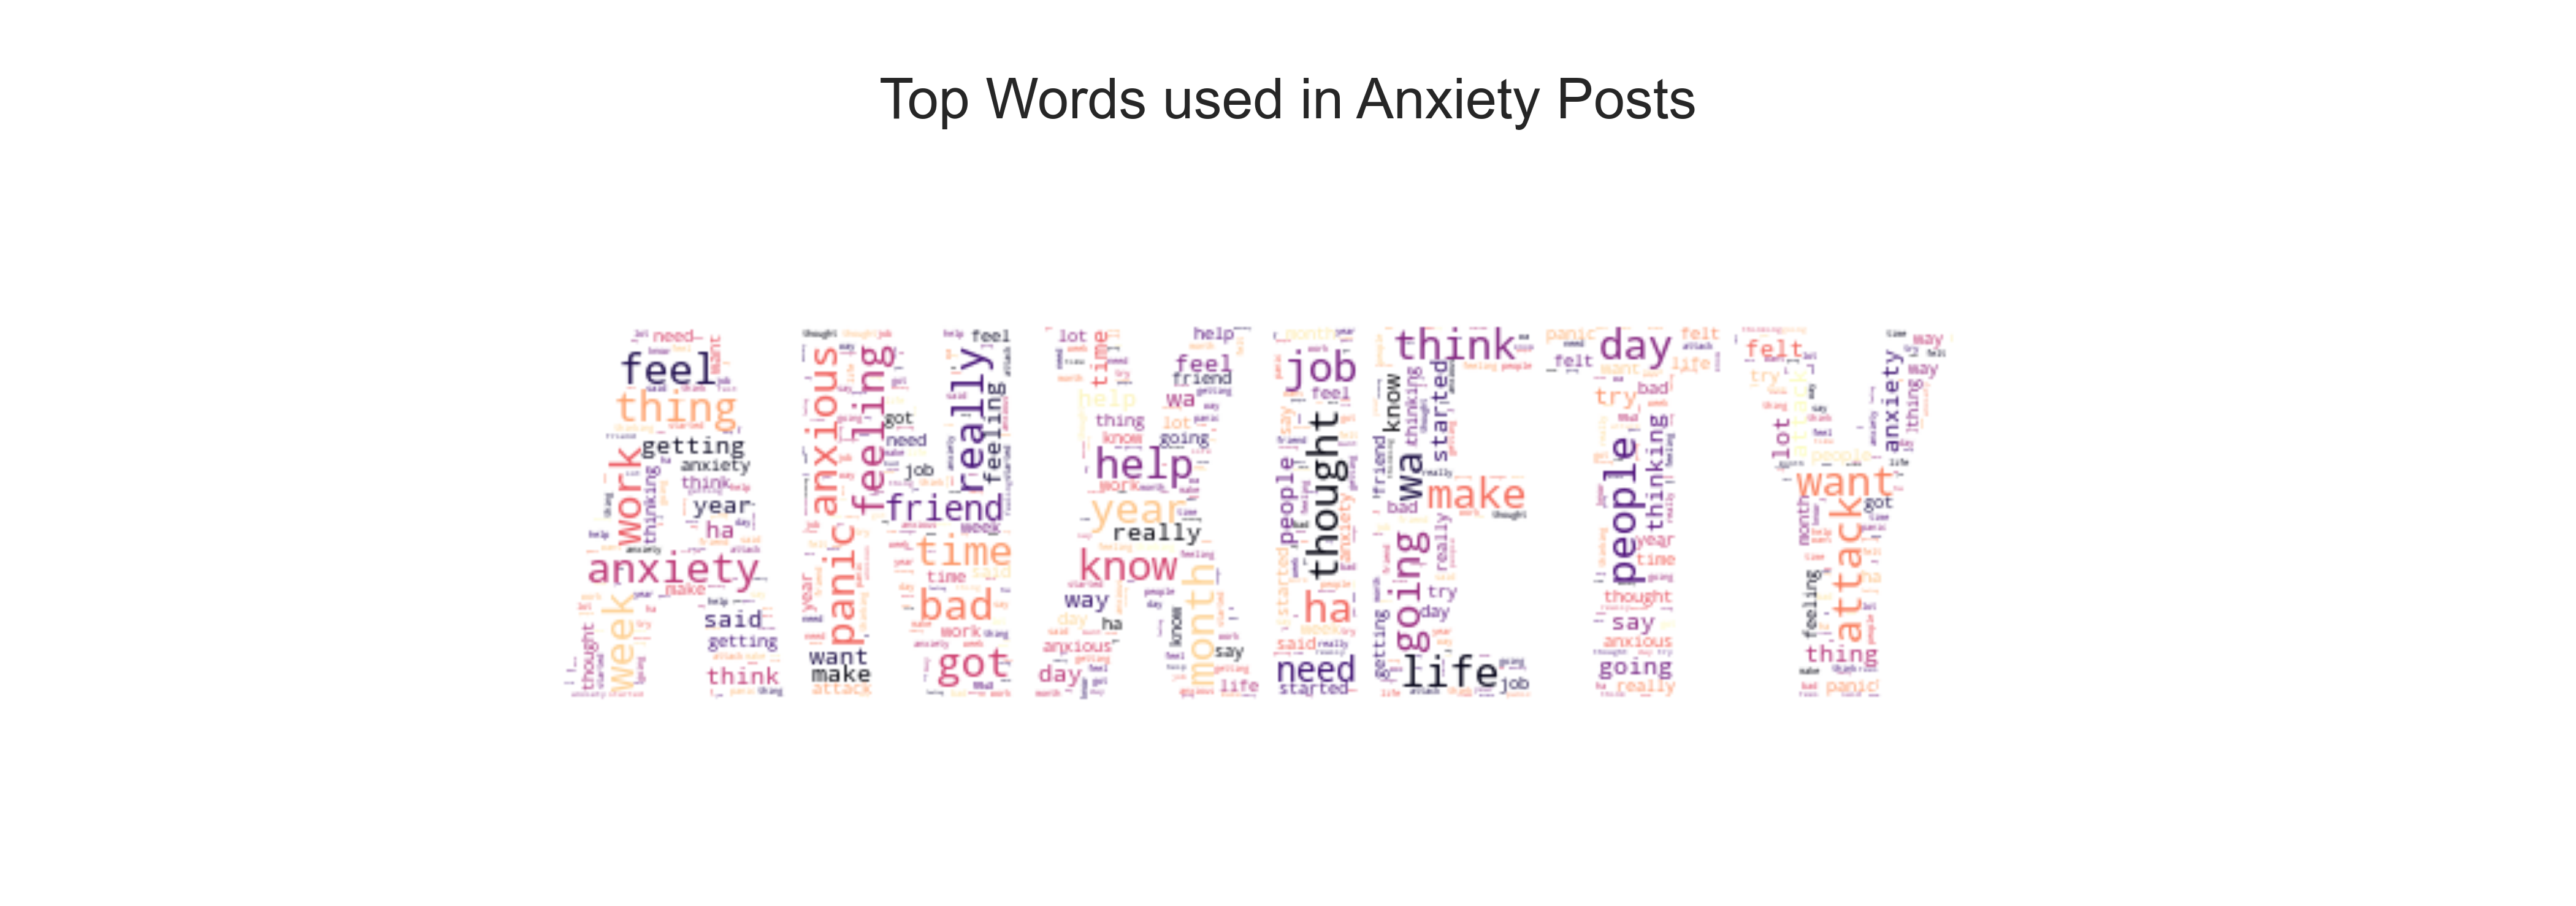

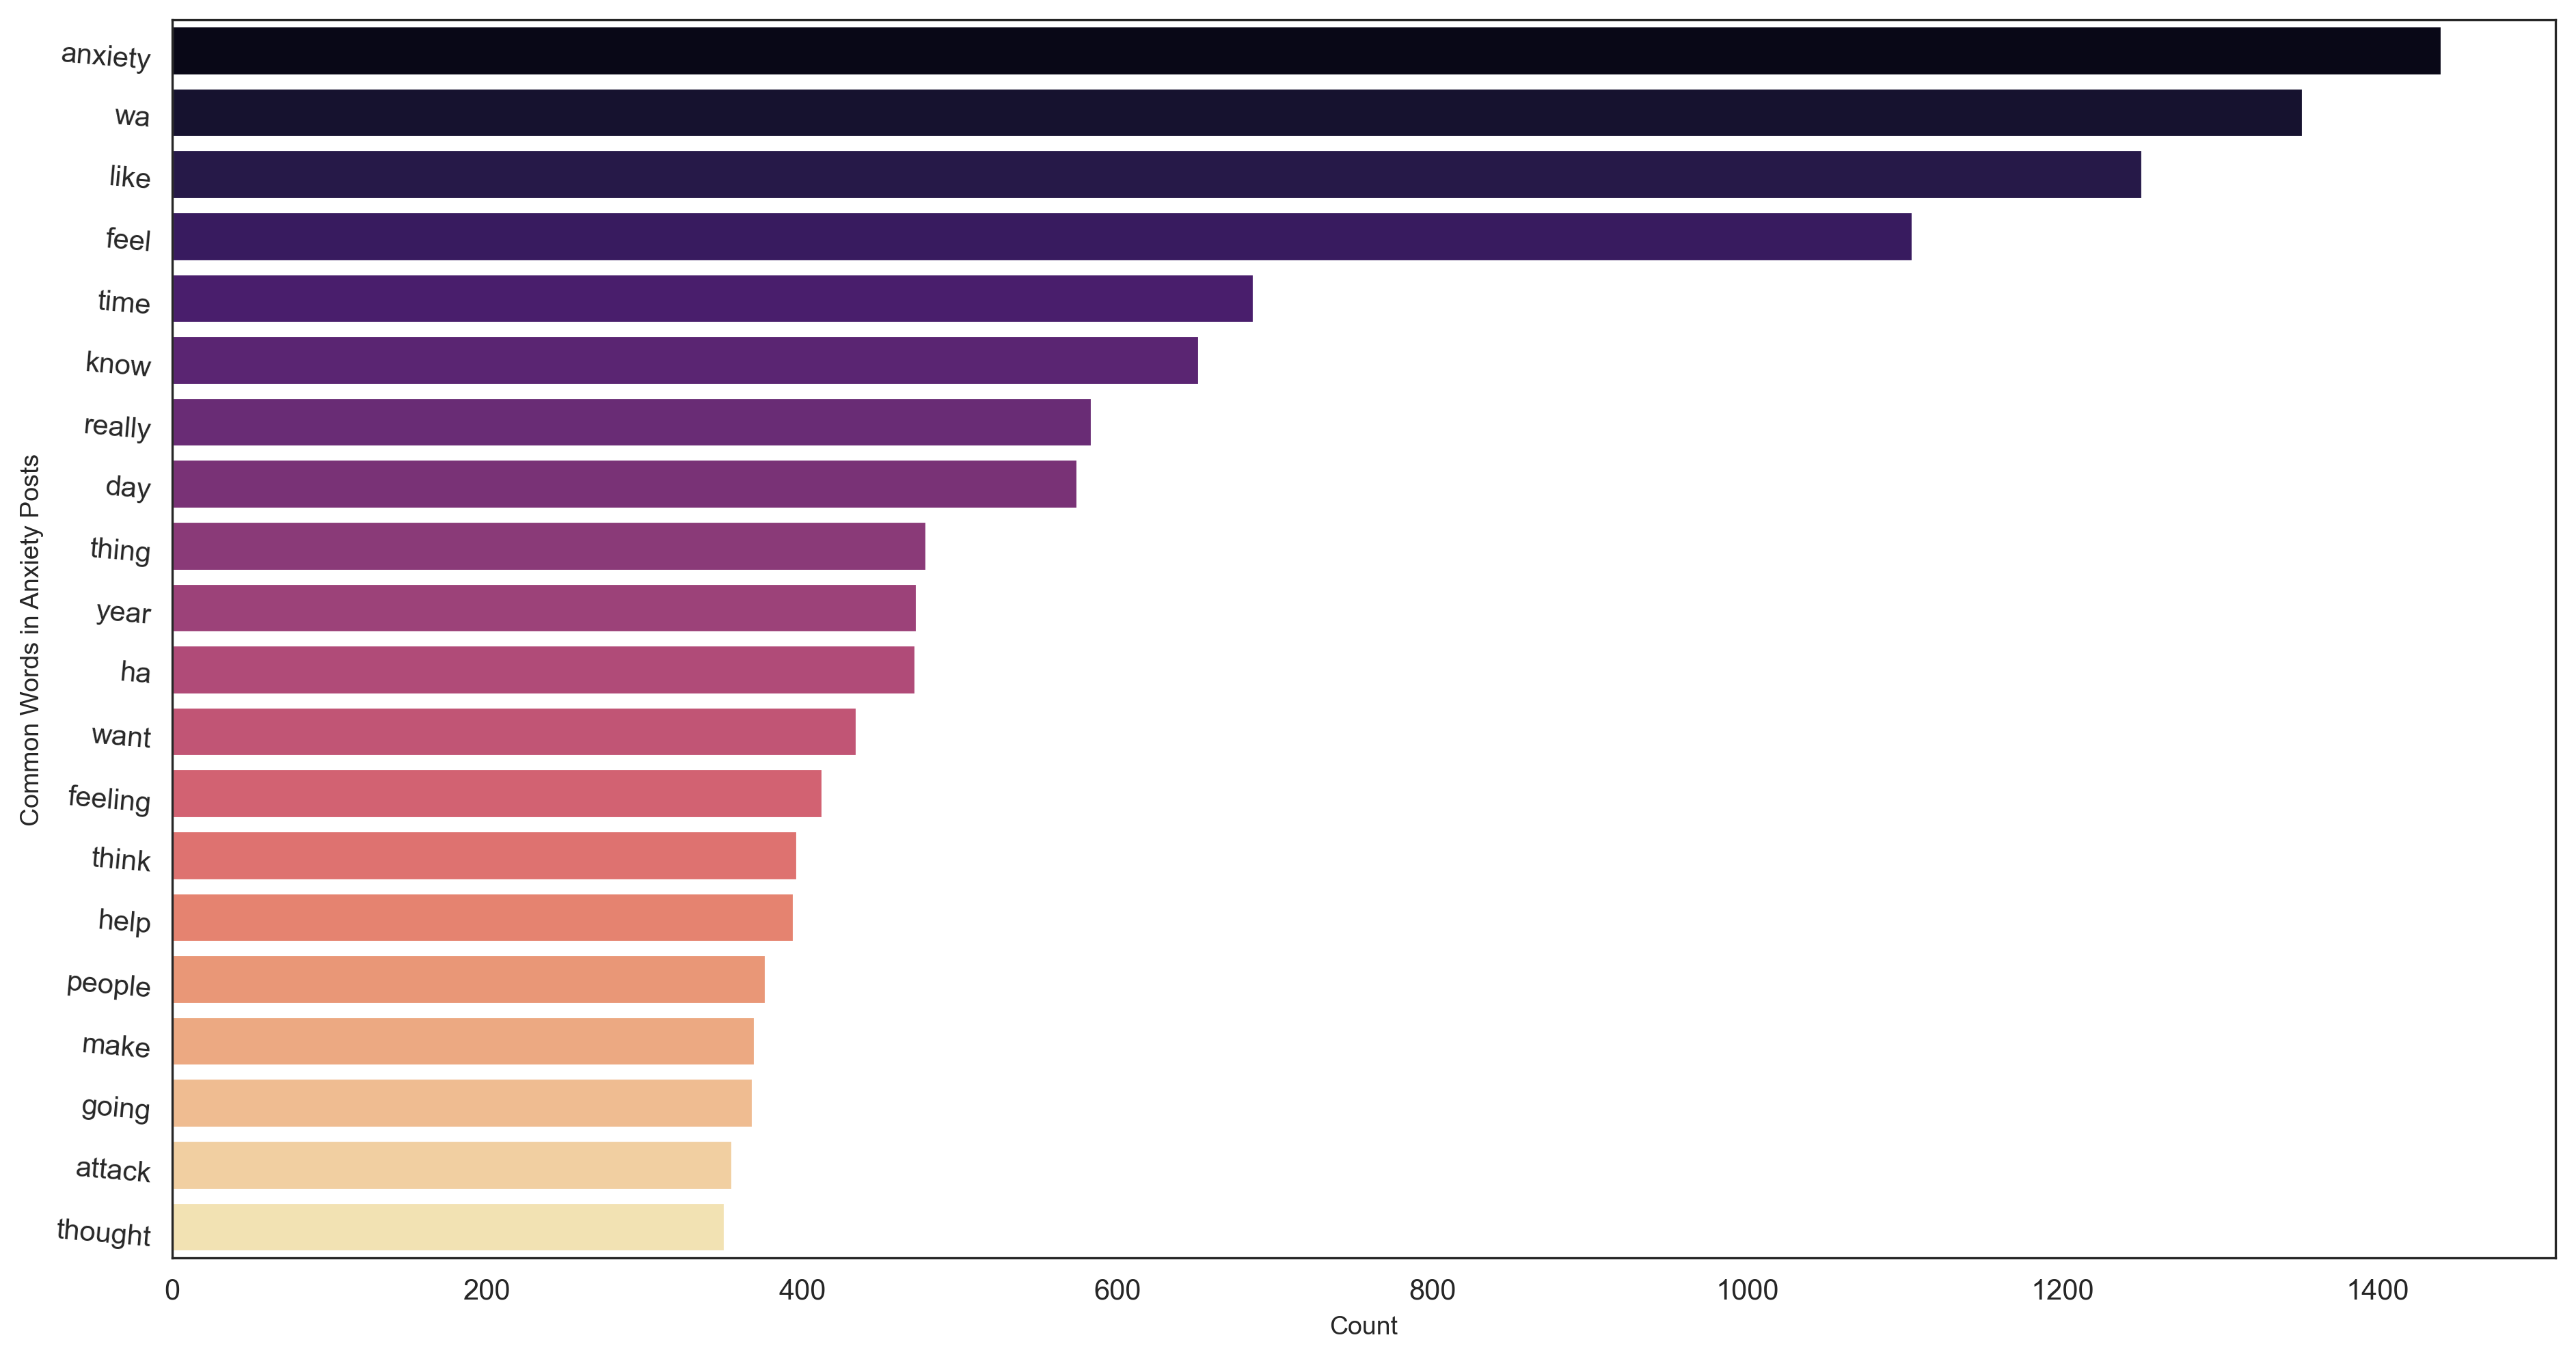

In [46]:
anxiety_words_freq = most_used_words("Anxiety Posts", anxiety_posts, palette="magma", image_mask="../assets/anxiety_mask.png")
# most_used_words(anxiety_titles)
# most_used_words(anxiety_authors)

### 2.3.2 Statistics

In [35]:
def make_1d(df):
    new_list = []
    for elements in df.values.tolist():
        new_list.extend(elements)
    return new_list

In [36]:
print("All posts:", len(combined_data))

print("Depression posts:", len(combined_data[combined_data["is_anxiety"] == 0]))
print("Anxiety posts:", len(combined_data[combined_data["is_anxiety"] == 1]))

All posts: 1930
Depression posts: 932
Anxiety posts: 998


In [37]:
all_1d_broken_sentences = make_1d(combined_data["selftext_broken_sentences"])
all_1d_broken_words = make_1d(combined_data["selftext_broken_words"])

all_1d_unique_broken_words = set(all_1d_broken_words)

print("All sentences count:", len(all_1d_broken_sentences))
print("All words count:", len(all_1d_broken_words))
print("All unique words count:", len(all_1d_unique_broken_words))

All sentences count: 19646
All words count: 162773
All unique words count: 10578


In [38]:
depression_1d_broken_sentences = make_1d(depression_broken_sentences)
depression_1d_broken_words = make_1d(depression_broken_words)
depression_1d_unique_broken_words = set(depression_1d_broken_words)

print("depression sentences count:", len(depression_1d_broken_sentences))
print("depression words count:", len(depression_1d_broken_words))
print("depression Unique words:", len(depression_1d_unique_broken_words))

depression sentences count: 10216
depression words count: 80588
depression Unique words: 7551


In [39]:
anxiety_1d_broken_sentences = make_1d(anxiety_broken_sentences)
anxiety_1d_broken_words = make_1d(anxiety_broken_words)
anxiety_1d_unique_broken_words = set(anxiety_1d_broken_words)

print("anxiety sentences count:", len(anxiety_1d_broken_sentences))
print("anxiety words count:", len(anxiety_1d_broken_words))
print("anxiety Unique words:", len(anxiety_1d_unique_broken_words))

anxiety sentences count: 9430
anxiety words count: 82185
anxiety Unique words: 7492


In [40]:
intersection_words = depression_1d_unique_broken_words.intersection(anxiety_1d_unique_broken_words)
difference_words = depression_1d_unique_broken_words.symmetric_difference(anxiety_1d_unique_broken_words)

print("intersection words count:", len(intersection_words))
print("difference words count:", len(difference_words))

intersection words count: 4465
difference words count: 6113


In [47]:
# depression_words_freq.sort_values(ascending = False).head(20)
# depression_words_freq.loc[list(difference_words)]
# result = depression_words_freq.filter(items=" ", axis=0)

print("Depression top 10 difference words")
df_depression_words_freq = pd.DataFrame({"word": depression_words_freq.index, "count": depression_words_freq.values})
df_depression_words_freq[["word", "count"]][df_depression_words_freq["word"].isin(difference_words)].sort_values("count", ascending = False).head(10)

Depression top 10 difference words


word  count
2187         eh     22
4119        mil     17
7093       ward     17
3929      lucas     17
628          ba     16
1671         dd     12
2174  education     12
5638       scar     12
4773       pity     11
793        bird     11

In [48]:
print("Anxiety top 10 difference words")
df_anxiety_words_freq = pd.DataFrame({"word": anxiety_words_freq.index, "count": anxiety_words_freq.values})
df_anxiety_words_freq[["word", "count"]][df_anxiety_words_freq["word"].isin(difference_words)].sort_values("count", ascending = False).head(10)

Anxiety top 10 difference words


word  count
2822          gad     37
6564     tingling     36
243      abortion     21
1046     caffeine     20
4297     nauseous     19
6930   vaccinated     17
4313       needle     16
2086         doom     15
4609  palpitation     15
3363    impending     14

### 2.3.3 Relative Normalized Frequency

In [86]:
# for intr_w in intersection_words:
depression_words_count = len(depression_1d_broken_words)
anxiety_words_count = len(anxiety_1d_broken_words)

depression_intersection_words_freq = pd.DataFrame({"word": depression_words_freq.index, "count": depression_words_freq.values})
depression_intersection_words_freq = depression_intersection_words_freq[["word", "count"]][depression_intersection_words_freq["word"].isin(intersection_words)]

anxiety_intersection_words_freq = pd.DataFrame({"word": anxiety_words_freq.index, "count": anxiety_words_freq.values})
anxiety_intersection_words_freq = anxiety_intersection_words_freq[["word", "count"]][anxiety_intersection_words_freq["word"].isin(intersection_words)]

In [134]:
# print("depression_words_count", depression_words_count)

# depression_intersection_words_freq

In [133]:
# print("anxiety_words_count", anxiety_words_count)

# anxiety_intersection_words_freq

In [122]:
# df_rnf = pd.DataFrame({"word": depression_intersection_words_freq["word"], "count": depression_intersection_words_freq["count"]})
# # df_rnf["count"] = (depression_intersection_words_freq["count"]/depression_words_count)/(anxiety_intersection_words_freq["count"]/anxiety_words_count)
# df_rnf["count"] = depression_intersection_words_freq["count"]/anxiety_intersection_words_freq["count"]
# df_rnf

# # (depression_intersection_words_freq["count"]/depression_words_count)/(anxiety_intersection_words_freq["count"]/anxiety_words_count)
# # .sort_values("count", ascending = False)

In [132]:
import collections


dep_ghy = collections.Counter(depression_1d_broken_words)
anx_ghy = collections.Counter(anxiety_1d_broken_words)

result = {}

for inter_w in intersection_words:
    result[inter_w] = (dep_ghy[inter_w]/depression_words_count) / (anx_ghy[inter_w]/anxiety_words_count)
#     break
sorted(result.items(), key=lambda item: item[1], reverse = True)

[('exist', 30.594505385417182),
 ('existence', 21.41615376979203),
 ('pretend', 18.35670323125031),
 ('creative', 15.297252692708591),
 ('faith', 15.297252692708591),
 ('bullied', 14.277435846528018),
 ('halfway', 13.257619000347447),
 ('mirror', 12.237802154166875),
 ('subject', 11.2179853079863),
 ('destroy', 11.2179853079863),
 ('scholarship', 10.198168461805729),
 ('apps', 10.198168461805729),
 ('happiness', 9.382314984861269),
 ('earth', 9.178351615625155),
 ('approach', 9.178351615625155),
 ('void', 9.178351615625155),
 ('suicide', 8.540966086762298),
 ('existing', 8.158534769444582),
 ('aunt', 8.158534769444582),
 ('wasted', 8.158534769444582),
 ('asian', 8.158534769444582),
 ('truth', 8.158534769444582),
 ('bare', 8.158534769444582),
 ('science', 8.158534769444582),
 ('enter', 8.158534769444582),
 ('funny', 7.818595820717724),
 ('gf', 7.648626346354296),
 ('bored', 7.648626346354296),
 ('hobby', 7.648626346354296),
 ('bye', 7.138717923264009),
 ('graduated', 7.138717923264009),

### 2.3.4 TF-IDF

In [107]:
document_depression = ' '.join(depression_1d_broken_words)
document_anxiety = ' '.join(anxiety_1d_broken_words)

In [108]:
vectorizer = TfidfVectorizer()

vectors = vectorizer.fit_transform([document_depression, document_anxiety])

feature_names = vectorizer.get_feature_names()

dense = vectors.todense()

denselist = dense.tolist()

df_tfidf = pd.DataFrame(denselist, columns=feature_names)
depression_tfidf = df_tfidf.iloc[0]
anxiety_tfidf = df_tfidf.iloc[1]

In [109]:
print("Depression top 10 TFIDF words")

depression_tfidf = pd.DataFrame({"word": depression_tfidf.index, "count": depression_tfidf.values})
depression_tfidf[["word", "count"]].sort_values("count", ascending = False).head(10)

Depression top 10 TFIDF words


word     count
10141    wa  0.310940
5517   like  0.300926
3707   feel  0.292664
10178  want  0.207043
5334   know  0.206042
5495   life  0.184761
4151    get  0.182258
9462   time  0.168238
3438   even  0.168238
10497  year  0.133439

In [110]:
print("Anxiety top 10 TFIDF words")

anxiety_tfidf = pd.DataFrame({"word": anxiety_tfidf.index, "count": anxiety_tfidf.values})
anxiety_tfidf[["word", "count"]].sort_values("count", ascending = False).head(10)

Anxiety top 10 TFIDF words


word     count
709    anxiety  0.349713
10141       wa  0.328356
5517      like  0.303602
3707      feel  0.268170
4151       get  0.191966
9462      time  0.166726
5334      know  0.158232
7522    really  0.141730
2464       day  0.139545
3438      even  0.121344

### 2.3.5 Visualize  corpus in HTML

In [111]:
#CREATING A DATAFRAME FOR SCATTERTEXT
combined_data["megatext_clean"] = combined_data["author_clean"] + " " + combined_data["selftext_clean"] + " " + combined_data["title_clean"]
scatter_data = combined_data[["megatext_clean", "is_anxiety"]]
scatter_data["category"] = scatter_data["is_anxiety"].map({0: "Depression", 1: "Anxiety"})
scatter_data.tail()

megatext_clean  \
1925  mali stic username applied static midterm tomorrow already failed course last semester repeating...   
1926  zed henson recently decided stop smoking weed socially therefore completely drinking thing conti...   
1927  tree nui tee recently got little habit thing get overwhelming go solo chat whatsapp vent attempt...   
1928                 cap z fan 5 need someone vent please something happened triggered anxiety really bad   
1929  panama ph everytime go grandma old house still alive assisted living irrational fear someone kno...   

      is_anxiety category  
1925           1  Anxiety  
1926           1  Anxiety  
1927           1  Anxiety  
1928           1  Anxiety  
1929           1  Anxiety

In [112]:
#PARSING TEXT FOR SCATTERTEXT
nlp = st.whitespace_nlp_with_sentences
scatter_data.groupby("category").apply(lambda x: x.megatext_clean.apply(lambda x: len(x.split())).sum())
scatter_data['parsed'] = scatter_data.megatext_clean.apply(nlp)
scatter_data.tail()

megatext_clean  \
1925  mali stic username applied static midterm tomorrow already failed course last semester repeating...   
1926  zed henson recently decided stop smoking weed socially therefore completely drinking thing conti...   
1927  tree nui tee recently got little habit thing get overwhelming go solo chat whatsapp vent attempt...   
1928                 cap z fan 5 need someone vent please something happened triggered anxiety really bad   
1929  panama ph everytime go grandma old house still alive assisted living irrational fear someone kno...   

      is_anxiety category  \
1925           1  Anxiety   
1926           1  Anxiety   
1927           1  Anxiety   
1928           1  Anxiety   
1929           1  Anxiety   

                                                                                                   parsed  
1925  (mali, stic, username, applied, static, midterm, tomorrow, already, failed, course, last, semest...  
1926  (zed, henson, recently, decided, stop, smoking, weed, socially, therefore, completely, drinking,...  
1927  (tree, nui, tee, recently, got, little, habit, thing, get, overwhelming, go, solo, chat, whatsap...  
1928  (cap, z, fan, 5, need, someone, vent, please, something, happened, triggered, anxiety, really, bad)  
1929  (panama, ph, everytime, go, grandma, old, house, still, alive, assisted, living, irrational, fea...

In [113]:
#DEFINING A CORPUS FOR SCATTERTEXT VISUALISATION
corpus = st.CorpusFromParsedDocuments(scatter_data, category_col="category", parsed_col="parsed").build()

In [114]:
html = produce_scattertext_explorer(corpus,
                                    category='Depression',
                                    category_name='Depression',
                                    not_category_name='Anxiety',
                                    width_in_pixels=1000,
                                    jitter=0.1,
                                    minimum_term_frequency=5,
                                    transform=st.Scalers.percentile,
                                    metadata=scatter_data['category']
                                   )
file_name = '../assets/Reddit_ScattertextRankDataJitter.html'
open(file_name, 'wb').write(html.encode('utf-8'))
IFrame(src=file_name, width = 1200, height=700)

In [115]:
#SAVING combined_data
combined_data.to_csv('../data/data_for_model.csv', index = False)